In [1]:
!cp /content/drive/MyDrive/learnplatform-covid19-impact-on-digital-learning.zip /content/

In [2]:
!unzip learnplatform-covid19-impact-on-digital-learning.zip

Archive:  learnplatform-covid19-impact-on-digital-learning.zip
  inflating: README.md               
  inflating: districts_info.csv      
  inflating: engagement_data/1000.csv  
  inflating: engagement_data/1039.csv  
  inflating: engagement_data/1044.csv  
  inflating: engagement_data/1052.csv  
  inflating: engagement_data/1131.csv  
  inflating: engagement_data/1142.csv  
  inflating: engagement_data/1179.csv  
  inflating: engagement_data/1204.csv  
  inflating: engagement_data/1270.csv  
  inflating: engagement_data/1324.csv  
  inflating: engagement_data/1444.csv  
  inflating: engagement_data/1450.csv  
  inflating: engagement_data/1470.csv  
  inflating: engagement_data/1536.csv  
  inflating: engagement_data/1549.csv  
  inflating: engagement_data/1558.csv  
  inflating: engagement_data/1570.csv  
  inflating: engagement_data/1584.csv  
  inflating: engagement_data/1624.csv  
  inflating: engagement_data/1705.csv  
  inflating: engagement_data/1712.csv  
  inflating: engageme

**District information data**
**(Information was taken from the reame that cam along with the dataset)**
"The district file districts_info.csv includes information about the characteristics of school districts, including data from NCES (2018-19), FCC (Dec 2018), and Edunomics Lab. In this data set, we removed the identifiable information about the school districts. We also used an open source tool ARX (Prasser et al. 2020) to transform several data fields and reduce the risks of re-identification. For data generalization purposes some data points are released with a range where the actual value falls under. Additionally, there are many missing data marked as 'NaN' indicating that the data was suppressed to maximize anonymization of the dataset."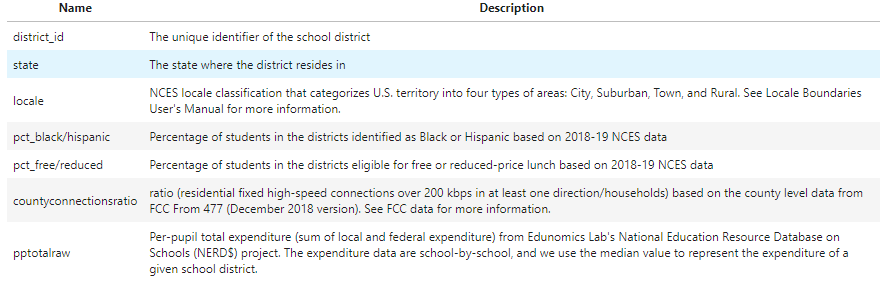

In [3]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import glob
import os

In [4]:
district_dataset=pd.read_csv('/content/districts_info.csv')
pd.set_option('display.max_columns', 500)
district_dataset.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


Choosing the features in the dataset and dropping the NAN values

In [ ]:
district_dataset=district_dataset[['district_id','state','locale','county_connections_ratio','pp_total_raw','pct_black/hispanic','pct_free/reduced','county_connections_ratio']]
district_dataset.dropna(inplace=True)

Converting the labels to string so we ca merge them later

In [6]:
district_dataset['district_id']=district_dataset['district_id'].apply(lambda x:str(x))

**Product Information**

The product file products_info.csv includes information about the characteristics of the top 372 products with most users in 2020. The categories listed in this file are part of LearnPlatform's product taxonomy. Data were labeled by our team. Some products may not have labels due to being duplicate, lack of accurate url or other reasons.


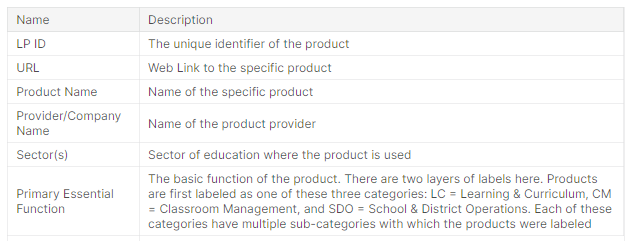

In [7]:
product_dataset=pd.read_csv('/content/products_info.csv')
pd.set_option('display.max_columns', 500)
product_dataset.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


Change the name so that we can later merge it with engagement data

In [9]:
product_dataset['lp_id']=product_dataset['LP ID']

**Engagement Data**

The structure of this foder is where the csv name represent the id of that district
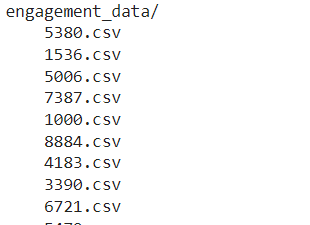

The engagement data are aggregated at school district level, and each file in the folder engagement_data represents data from one school district. The 4-digit file name represents district_id which can be used to link to district information in district_info.csv. The lp_id can be used to link to product information in product_info.csv.
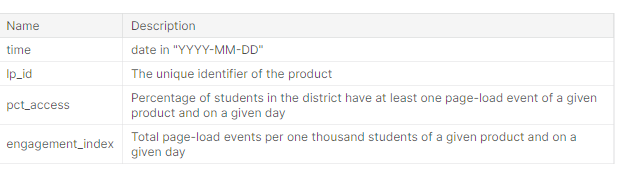

We will first merge all the files in the engagement folder to make a single file with district IDs stored in that column

In [8]:
engagement_folder=os.listdir('engagement_data')
list_of_dataframes=[]
for file in engagement_folder[:50]:
  ID_district=file.split('.')[0]
  df=pd.read_csv('engagement_data/'+file)
  df['district_id']=ID_district
  list_of_dataframes.append(df)


engagement_dataset = pd.concat(list_of_dataframes)
engagement_dataset = engagement_dataset.reset_index(drop=True)
engagement_dataset.head()  


,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,99916.0,1.14,200.76,5380
1,2020-01-01,81457.0,0.38,15.15,5380
2,2020-01-01,80144.0,0.38,3.79,5380
3,2020-01-01,18090.0,0.38,11.36,5380
4,2020-01-01,35561.0,0.38,3.79,5380


**Merging all the three Files**

First we will merge district dataset and engagement dataset based on their  district ids

In [10]:
df_merged=pd.merge(district_dataset, engagement_dataset, how="right", left_on="district_id", right_on="district_id")
df_merged1=pd.merge(df_merged, product_dataset, how="left", left_on="lp_id", right_on="lp_id")
df_merged1.drop(["lp_id", "district_id", "lp_id"], axis=1, inplace=True)

#del districs, product, engagement

df_merged1.head()

,state,locale,county_connections_ratio,pp_total_raw,pct_black/hispanic,pct_free/reduced,county_connections_ratio,time,pct_access,engagement_index,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01,1.14,200.76,99916.0,https://drive.google.com/start,Google Drive,Google LLC,PreK-12; Higher Ed; Corporate,LC/CM/SDO - Other
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01,0.38,15.15,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01,0.38,3.79,80144.0,https://www.quora.com/,Quora,Quora,PreK-12; Higher Ed; Corporate,LC - Study Tools - Q&A
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01,0.38,11.36,18090.0,https://minecraft.net/en-us/,Minecraft,Microsoft,PreK-12; Higher Ed,"LC - Sites, Resources & Reference - Games & Si..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01,0.38,3.79,NaN,NaN,NaN,NaN,NaN,NaN


Now we will extract information like holidays, pandemic is there or not  week etc. from it

In [12]:
df_merged1['time']= pd.to_datetime(df_merged1['time'])
df_merged1['week']= df_merged1['time'].dt.dayofweek 
df_merged1['holiday']=df_merged1['week'].apply(lambda x: 1 if x in [5,6] else 0)
d = pd.date_range(start="2020-01-01", end="2020-01-19")
df_merged1["is_pandemic"] = df_merged1['time'].apply(lambda x: 0 if x in d else 1)


Next is we drop the week column

In [13]:
df_merged1.drop("week", axis=1, inplace=True)

In [14]:
df_merged2=df_merged1.copy()

In [16]:
df_merged2.dropna(inplace=True)

In [18]:
df_merged2.drop(['county_connections_ratio'],axis=1,inplace=True)

In [19]:
df_merged2.head()

,state,locale,pp_total_raw,pct_black/hispanic,pct_free/reduced,time,pct_access,engagement_index,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,holiday,is_pandemic
21850,Indiana,Rural,"[8000, 10000[","[0, 0.2[","[0.4, 0.6[",2020-01-01,0.08,0.76,64948.0,https://prodigygame.com/,Prodigy,SMARTeacher Inc.,PreK-12,"LC - Sites, Resources & Reference - Games & Si...",0,0
21851,Indiana,Rural,"[8000, 10000[","[0, 0.2[","[0.4, 0.6[",2020-01-01,0.61,116.79,95731.0,http://docs.google.com/,Google Docs,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation,0,0
21852,Indiana,Rural,"[8000, 10000[","[0, 0.2[","[0.4, 0.6[",2020-01-01,0.08,0.76,51340.0,https://www.grammarly.com/,Grammarly,Grammarly,PreK-12; Higher Ed; Corporate,LC - Study Tools,0,0
21856,Indiana,Rural,"[8000, 10000[","[0, 0.2[","[0.4, 0.6[",2020-01-01,0.08,0.76,11286.0,https://abcnews.go.com/?cid=marketing_search_A...,ABC News,ABC digital,PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference",0,0
21857,Indiana,Rural,"[8000, 10000[","[0, 0.2[","[0.4, 0.6[",2020-01-01,0.08,29.01,86703.0,https://www.gonoodle.com/,GoNoodle,HealthTeacher,PreK-12,CM - Classroom Engagement & Instruction - Clas...,0,0


Next Step is to convert the ranges to useful formats

In [33]:
def convert_range_pct_black(x):
  try:
    x=str(x)
    x=x.replace('[','')
    upper_value = float(x.split(",")[0])
    lower_value = float(x.split(",")[1])
    return (upper_value+lower_value) / 2
  except:
    return x  

def convert_range_pp_total_raw(x):
  try:
        x = str(x)
        x=x.replace('[','')
        upper_value = int(x.split(",")[0])
        lower_value = int(x.split(",")[1])
        return (upper_value+lower_value) // 2 
  except:
        return x

In [34]:
df_merged2['pp_total_raw']=df_merged2['pp_total_raw'].apply(convert_range_pp_total_raw)
df_merged2['pct_black/hispanic']=df_merged2['pct_black/hispanic'].apply(convert_range_pct_black)
df_merged2['pct_free/reduced']=df_merged2['pct_free/reduced'].apply(convert_range_pct_black)


In [35]:
len(df_merged2)

709239

In [36]:
df_merged2

,state,locale,pp_total_raw,pct_black/hispanic,pct_free/reduced,time,pct_access,engagement_index,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,holiday,is_pandemic
21850,Indiana,Rural,9000,0.1,0.5,2020-01-01,0.08,0.76,64948.0,https://prodigygame.com/,Prodigy,SMARTeacher Inc.,PreK-12,"LC - Sites, Resources & Reference - Games & Si...",0,0
21851,Indiana,Rural,9000,0.1,0.5,2020-01-01,0.61,116.79,95731.0,http://docs.google.com/,Google Docs,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation,0,0
21852,Indiana,Rural,9000,0.1,0.5,2020-01-01,0.08,0.76,51340.0,https://www.grammarly.com/,Grammarly,Grammarly,PreK-12; Higher Ed; Corporate,LC - Study Tools,0,0
21856,Indiana,Rural,9000,0.1,0.5,2020-01-01,0.08,0.76,11286.0,https://abcnews.go.com/?cid=marketing_search_A...,ABC News,ABC digital,PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference",0,0
21857,Indiana,Rural,9000,0.1,0.5,2020-01-01,0.08,29.01,86703.0,https://www.gonoodle.com/,GoNoodle,HealthTeacher,PreK-12,CM - Classroom Engagement & Instruction - Clas...,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3928523,Washington,City,13000,0.3,0.5,2020-12-31,0.15,15.20,28456.0,http://www.smartmusic.com,SmartMusic,"MakeMusic, Inc.",PreK-12; Higher Ed,LC - Study Tools,0,1
3928528,Washington,City,13000,0.3,0.5,2020-12-31,0.07,1.79,18697.0,https://myap.collegeboard.org/login,College Board AP Classroom,The College Board,PreK-12,LC - Study Tools - Test Prep & Study Skills,0,1
3928532,Washington,City,13000,0.3,0.5,2020-12-31,0.01,0.21,48333.0,https://hangouts.google.com/,Google Hangouts,Google LLC,PreK-12; Higher Ed; Corporate,CM - Virtual Classroom - Video Conferencing & ...,0,1
3928534,Washington,City,13000,0.3,0.5,2020-12-31,0.07,19.84,61517.0,http://www.hmhco.com/shop/education-curriculum...,¡Avancemos!,Houghton Mifflin Harcourt,PreK-12,LC - Courseware & Textbooks,0,1


In [31]:
df_merged2.to_csv('USdatasetforPrediction.csv')

# References

1.   https://www.kaggle.com/c/learnplatform-covid19-impact-on-digital-learning
2.   https://www.kaggle.com/ruchi798/covid-19-impact-on-digital-learning-eda-w-b
3.   https://www.kaggle.com/kooose/digital-learning-state-eda-and-predict-engagement

